In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from qutip import tensor, num, qeye, create, destroy, basis, sesolve, expect, mesolve
from compute_g0 import compute_g0
from compute_fidelity import compute_fidelity

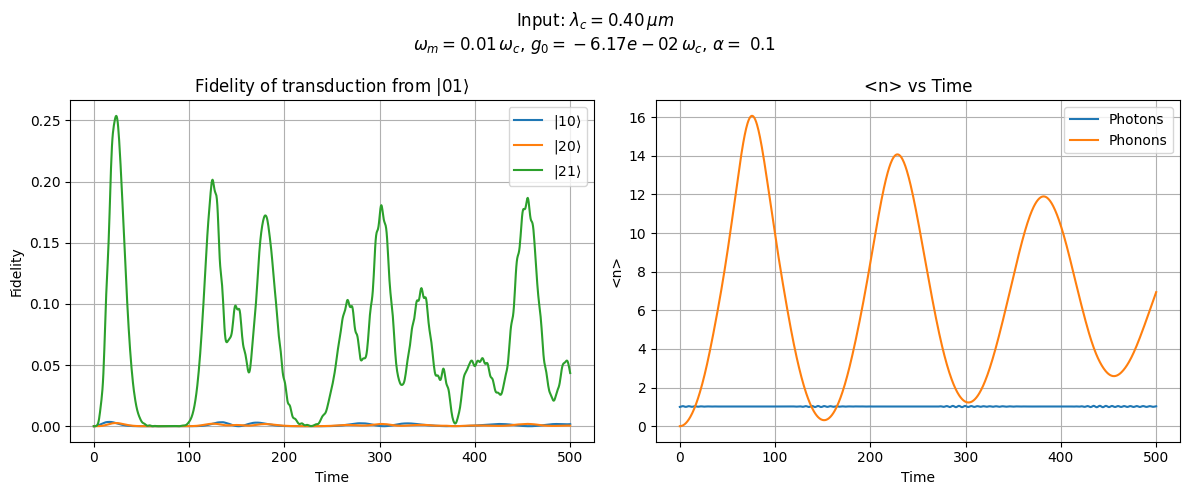

In [2]:
# specify all wavelengths in micrometers
omega_array, g_0_array = compute_g0(outcar_name='OUTCAR_hydrostatic_100kB', 
        plot_min_wavelength=0.4*1e-6, plot_max_wavelength= 1.7*1e-6, plot=False,
        cavity_length= 2*1e-5, semiconductor_length= 1e-5)
alpha = 0.1
omega_photon = 2*np.pi*3*10**8/(0.4*10**-6)
omega_phonon = 2*np.pi*10**13

max_fidelities, results = compute_fidelity(omega_array, g_0_array, alpha, omega_photon, omega_phonon,
                 photon_loss_rate= 0, truncation_photon_space = 5, truncation_phonon_space = 50, simulation_time= 500,
                 plot = True, set_g_0 = None)

### Fidelity againt semiconductor length

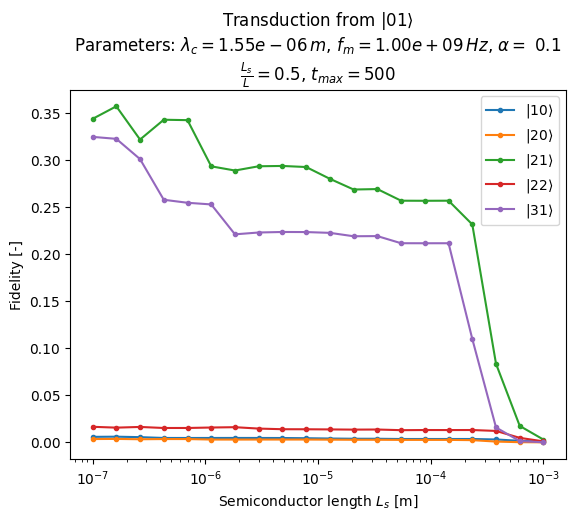

In [19]:
alpha = 0.1
wavelength_photon = 1.55*1e-6 # m
frequency_phonon = 1e9 # Hz
tmax = 500

omega_phonon = 2*np.pi*frequency_phonon
cavity_semiconductor_length_factor = 2

omega_photon = 2*np.pi*3*10**8/wavelength_photon
expected_keys = ['10', '20', '21', '22', '31']
fidelity_dict = {key: [] for key in expected_keys}

lengths = np.logspace(-7, -3, 20)
for semiconductor_length in lengths:
    omega_array, g_0_array = compute_g0(outcar_name='OUTCAR_hydrostatic_100kB', 
        plot_min_wavelength=0.4*1e-6, plot_max_wavelength= 1.7*1e-6, plot=False,
        cavity_length= cavity_semiconductor_length_factor*semiconductor_length, semiconductor_length= semiconductor_length)
    
    max_fidelities, results = compute_fidelity(omega_array, g_0_array, alpha, omega_photon, omega_phonon,
                 photon_loss_rate= 0, truncation_photon_space = 5, truncation_phonon_space = 50, simulation_time = tmax,
                 plot = False, set_g_0 = None)

    for key, value in max_fidelities.items():
        fidelity_dict[key].append(value)

for key in expected_keys:
    plt.plot(lengths, fidelity_dict[key], label=rf'$\vert {key}\rangle$', marker='.')
plt.xscale('log')
plt.xlabel(r'Semiconductor length $L_s$ [m]')
plt.ylabel('Fidelity [-]')
plt.title(r'Transduction from $\vert 01 \rangle$' '\n' rf'Parameters: $\lambda_c = {wavelength_photon:.2e} \, m$, ' rf'$f_m = {frequency_phonon:.2e} \, Hz$, $\alpha =$ {alpha}' '\n' r'$\frac{L_s}{L} = $' f'{1/cavity_semiconductor_length_factor}, ' r'$t_{max} = $' f'{tmax}')
plt.legend()
plt.show()

### Fidelity against fraction of semiconductor in a cavity

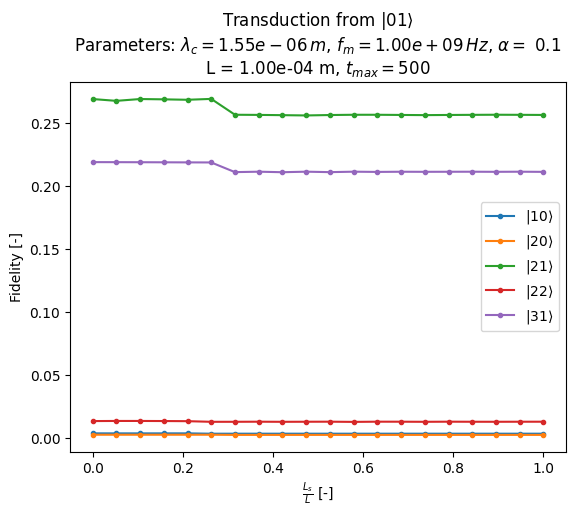

In [ ]:
alpha = 0.1
wavelength_photon = 1.55*1e-6 # m
frequency_phonon = 1e9 # Hz
tmax = 500

omega_phonon = 2*np.pi*frequency_phonon
cavity_semiconductor_length_factor = 2
cavity_length = 1e-4 # m

omega_photon = 2*np.pi*3*10**8/wavelength_photon
expected_keys = ['10', '20', '21', '22', '31']
fidelity_dict = {key: [] for key in expected_keys}

length_factors = np.linspace(0, 1, 20)
for factor in length_factors:
    omega_array, g_0_array = compute_g0(outcar_name='OUTCAR_hydrostatic_100kB', 
        plot_min_wavelength=0.4*1e-6, plot_max_wavelength= 1.7*1e-6, plot=False,
        cavity_length= cavity_length, semiconductor_length= cavity_length*factor)
    
    max_fidelities, results = compute_fidelity(omega_array, g_0_array, alpha, omega_photon, omega_phonon,
                 photon_loss_rate = 0, truncation_photon_space = 5, truncation_phonon_space = 50, simulation_time = tmax,
                 plot = False, set_g_0 = None)

    for key, value in max_fidelities.items():
        fidelity_dict[key].append(value)

for key in expected_keys:
    plt.plot(length_factors, fidelity_dict[key], label=rf'$\vert {key}\rangle$', marker='.')
plt.xlabel(r'$\frac{L_s}{L}$ [-]')
plt.ylabel('Fidelity [-]')
plt.title(r'Transduction from $\vert 01 \rangle$' '\n' rf'Parameters: $\lambda_c = {wavelength_photon:.2e} \, m$, ' rf'$f_m = {frequency_phonon:.2e} \, Hz$, $\alpha =$ {alpha}' '\n' rf'L = {cavity_length:.2e} m, ' r'$t_{max} = $' f'{tmax}')
plt.legend()
plt.show()

### Fidelity against phonon frequency

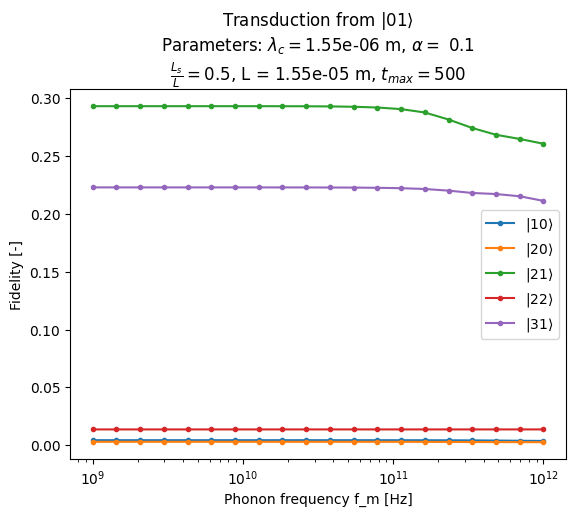

In [31]:
alpha = 0.1
wavelength_photon = 1.55*1e-6 # m
tmax = 500
cavity_semiconductor_length_factor = 2
cavity_length = 10*wavelength_photon # m

omega_photon = 2*np.pi*3*10**8/wavelength_photon
expected_keys = ['10', '20', '21', '22', '31']
fidelity_dict = {key: [] for key in expected_keys}

phonon_frequencies = 2*np.pi*np.logspace(9, 12, 20)
for omega_phonon in phonon_frequencies:
    omega_array, g_0_array = compute_g0(outcar_name='OUTCAR_hydrostatic_100kB', 
        plot_min_wavelength=0.4*1e-6, plot_max_wavelength= 1.7*1e-6, plot=False,
        cavity_length= cavity_length, semiconductor_length= cavity_length/cavity_semiconductor_length_factor)
    
    max_fidelities, results = compute_fidelity(omega_array, g_0_array, alpha, omega_photon, omega_phonon,
                 photon_loss_rate= 0, truncation_photon_space = 5, truncation_phonon_space = 50, simulation_time = tmax,
                 plot = False, set_g_0 = None)

    for key, value in max_fidelities.items():
        fidelity_dict[key].append(value)

for key in expected_keys:
    plt.plot(phonon_frequencies/(2*np.pi), fidelity_dict[key], label=rf'$\vert {key}\rangle$', marker='.')
plt.xscale('log')
plt.xlabel(r'Phonon frequency f_m [Hz]')
plt.ylabel('Fidelity [-]')
plt.title(r'Transduction from $\vert 01 \rangle$' '\n' rf'Parameters: $\lambda_c = ${wavelength_photon:.2e} m, ' rf'$\alpha =$ {alpha}' '\n' r'$\frac{L_s}{L} = $' f'{1/cavity_semiconductor_length_factor}, '  rf'L = {cavity_length:.2e} m, ' r'$t_{max} = $' f'{tmax}')
plt.legend()
plt.show()

### Fidelity against mean cavity field

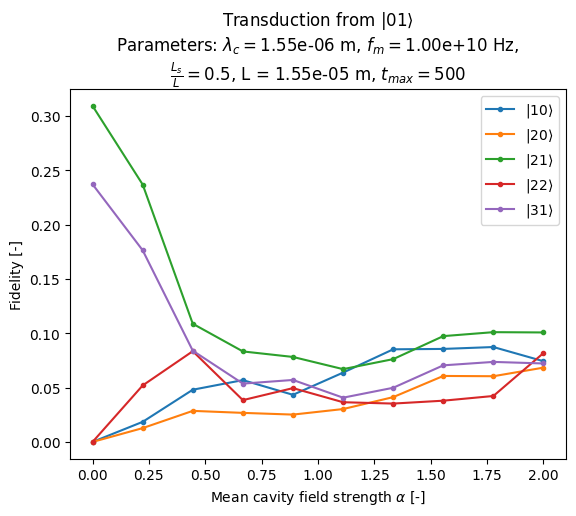

In [30]:
wavelength_photon = 1.55*1e-6 # m
omega_phonon = 2*np.pi*1e10 # 10 GHz
tmax = 500
cavity_semiconductor_length_factor = 2
cavity_length = 10*wavelength_photon # m

omega_photon = 2*np.pi*3*10**8/wavelength_photon
expected_keys = ['10', '20', '21', '22', '31']
fidelity_dict = {key: [] for key in expected_keys}

alpha_array = np.linspace(0, 2, 10)
for alpha in alpha_array:
    omega_array, g_0_array = compute_g0(outcar_name='OUTCAR_hydrostatic_100kB', 
        plot_min_wavelength=0.4*1e-6, plot_max_wavelength= 1.7*1e-6, plot=False,
        cavity_length= cavity_length, semiconductor_length= cavity_length/cavity_semiconductor_length_factor)
    
    max_fidelities, results = compute_fidelity(omega_array, g_0_array, alpha, omega_photon, omega_phonon,
                 photon_loss_rate= 0, truncation_photon_space = 5, truncation_phonon_space = 50, simulation_time = tmax,
                 plot = False, set_g_0 = None)

    for key, value in max_fidelities.items():
        fidelity_dict[key].append(value)

for key in expected_keys:
    plt.plot(alpha_array, fidelity_dict[key], label=rf'$\vert {key}\rangle$', marker='.')
plt.xlabel(r'Mean cavity field strength $\alpha$ [-]')
plt.ylabel('Fidelity [-]')
plt.title(r'Transduction from $\vert 01 \rangle$' '\n' rf'Parameters: $\lambda_c = ${wavelength_photon:.2e} m, ' rf'$f_m = ${omega_phonon/(2*np.pi):.2e} Hz,' '\n' r'$\frac{L_s}{L} = $' f'{1/cavity_semiconductor_length_factor}, '  rf'L = {cavity_length:.2e} m, ' r'$t_{max} = $' f'{tmax}')
plt.legend()
plt.show()